# Machine learning pipeline

## 펭귄 몸무게 예측 
*  P value: 내 모델이 맞나 안맞나에 대한 검증 

In [1]:
import sklearn
sklearn.__version__

'1.0.2'

In [2]:
import seaborn as sns

df_peng = sns.load_dataset("penguins")          # data 불러오기
df_peng = df_peng.dropna()                      # 결측치 제거

print(f"# shape of dataset: {df_peng.shape}")   # shape 확인
display(df_peng.head(3))                        # data 확인

# shape of dataset: (333, 7)


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female


In [3]:
df_peng.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


In [4]:
y = df_peng["body_mass_g"]                      # y feature 추출
X = df_peng.drop("body_mass_g", axis=1)         # 전체 - y = X

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)
print(f"전체 데이터 수 = {X.shape[0]}")
print(f"train set 데이터 수 = {X_train.shape[0]}")
print(f"test set 데이터 수 = {X_test.shape[0]}")

전체 데이터 수 = 333
train set 데이터 수 = 266
test set 데이터 수 = 67


# Onehotencoder 
- pd.getdummies 쓰지 말기 
- OneHotEncoder

In [6]:
# 라이브러리 사용
from sklearn.preprocessing import OneHotEncoder

# 예제 데이터 1
data_sample1 = [["Apple"], 
                ["Banana"], 
                ["Cherry"]]

# 예제 데이터 1 OneHotEncoder 학습 & 변환
ohe = OneHotEncoder()                           # one-hot encoder 생성
s_ohe1 = ohe.fit_transform(data_sample1)        # 학습(fit) 후 변환(transform)
print(s_ohe1.toarray())                         # 출력

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [7]:
# 예제 데이터 2 
data_sample2 = [["Banana"]]

# 예제 데이터 2 OneHotEncoder 변환
s_ohe2 = ohe.transform(data_sample2)            # 학습(fit) 없이 변환(transform)
print(s_ohe2.toarray())                         # 출력

[[0. 1. 0.]]


In [8]:
# 펭귄 데이터
cols_category = ["species", "island", "sex"]            # 변환 대상
X_train[cols_category].head(5)                          # 일부 확인

,species,island,sex
109,Adelie,Biscoe,Male
263,Gentoo,Biscoe,Male
327,Gentoo,Biscoe,Male
195,Chinstrap,Dream,Female
127,Adelie,Torgersen,Male


In [9]:
ohe = OneHotEncoder()                                   # one-hot encoder 생성
X_train_ohe = ohe.fit_transform(X_train[cols_category]) # 학습 & 변환                    
print(X_train_ohe.toarray()[:5])                        # 일부 확인

[[1. 0. 0. 1. 0. 0. 0. 1.]
 [0. 0. 1. 1. 0. 0. 0. 1.]
 [0. 0. 1. 1. 0. 0. 0. 1.]
 [0. 1. 0. 0. 1. 0. 1. 0.]
 [1. 0. 0. 0. 0. 1. 0. 1.]]


In [11]:
X_test_ohe = ohe.transform(X_test[cols_category])        # 학습 없이 변환만.
print(X_test_ohe.toarray()[:5])                          # 일부 확인

[[1. 0. 0. 0. 0. 1. 1. 0.]
 [1. 0. 0. 0. 1. 0. 0. 1.]
 [1. 0. 0. 0. 1. 0. 0. 1.]
 [0. 1. 0. 0. 1. 0. 1. 0.]
 [0. 0. 1. 1. 0. 0. 0. 1.]]


In [12]:
cols_numerical = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm"]   # 변환 대상
X_train[cols_numerical].head(5)                                             # 일부 확인

,bill_length_mm,bill_depth_mm,flipper_length_mm
109,43.2,19.0,197.0
263,49.6,15.0,216.0
327,53.4,15.8,219.0
195,45.5,17.0,196.0
127,41.5,18.3,195.0


In [13]:
from sklearn.preprocessing import StandardScaler

stdscaler = StandardScaler()                                            # standard scaler 생성
X_train_std = stdscaler.fit_transform(X_train[cols_numerical])          # 학습 & 변환
print(X_train_std[:5])                                                  # 일부 확인

[[-0.1310646   0.94530743 -0.28430162]
 [ 1.02862549 -1.09777018  1.09068442]
 [ 1.71719149 -0.68915465  1.30778747]
 [ 0.28569903 -0.07623137 -0.35666931]
 [-0.43910728  0.58776885 -0.429037  ]]


In [14]:
X_test_std = stdscaler.transform(X_test[cols_numerical])                # 학습 & 변환
print(X_test_std[:5])                                                   # 일부 확인

[[-1.39947564  0.02592251 -1.00797849]
 [-0.1310646   0.68992273 -0.64614006]
 [-0.51158791  0.17915333 -0.79087543]
 [ 0.41254013  0.17915333 -1.00797849]
 [ 1.17358676 -0.94453936  1.66962591]]


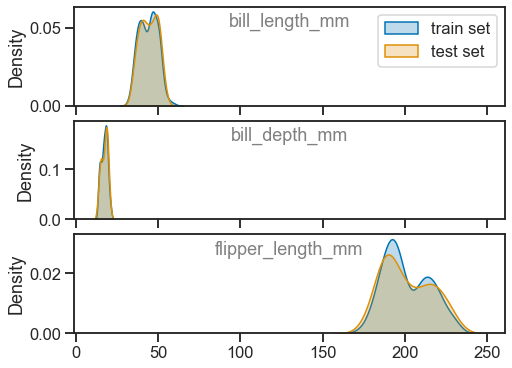

In [15]:
sns.set_style("ticks")
sns.set_palette("colorblind")
sns.set_context("talk")

import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=3, figsize=(7, 5), constrained_layout=True, sharex=True)
for ax, col in zip(axs, ["bill_length_mm", "bill_depth_mm", "flipper_length_mm"]):
    sns.kdeplot(x=col, data=X_train, fill=True, ax=ax, label="train set")
    sns.kdeplot(x=col, data=X_test, fill=True, ax=ax, label="test set")
    ax.text(0.5, 0.8, col, ha="center", transform=ax.transAxes, color="gray")
    ax.set_xlabel("")

axs[0].legend()

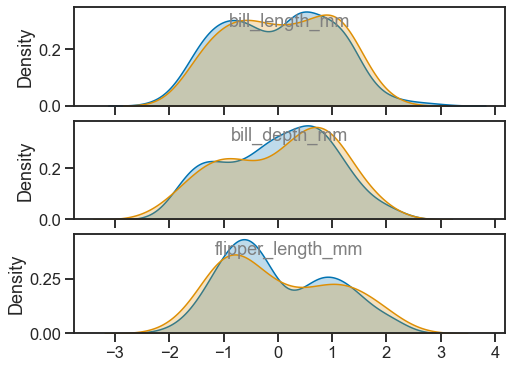

In [16]:
fig, axs = plt.subplots(nrows=3, figsize=(7, 5), constrained_layout=True, sharex=True)
for i, ax in enumerate(axs):
    sns.kdeplot(X_train_std[:, i], fill=True, ax=ax)
    sns.kdeplot(X_test_std[:, i], fill=True, ax=ax)
    ax.text(0.5, 0.8, cols_numerical[i], ha="center", transform=ax.transAxes, color="gray")
    ax.set_xlabel("")

# Concat

In [17]:
# 두 데이터 결합

import numpy as np

X_train_c = np.concatenate([X_train_ohe.toarray(), X_train_std], axis=1)    # train set 결합
X_test_c = np.concatenate([X_test_ohe.toarray(), X_test_std], axis=1)       # test set 결합
print(X_train_c.shape)

(266, 11)


In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

rf = RandomForestRegressor()            # 머신 러닝 모델 선택 : Random Forest Regressor
rf.fit(X_train_c, y_train)              # 머신 러닝 모델 학습

y_train_pred = rf.predict(X_train_c)    # 학습 X 데이터로 y 예측
y_test_pred = rf.predict(X_test_c)      # 평가 X 데이터로 y 예측

print(f"# R2_train = {r2_score(y_train, y_train_pred):.03f}")   # 학습 데이터 R2
print(f"# R2_val = {r2_score(y_test, y_test_pred):.03f}")       # 평가 데이터 R2

# R2_train = 0.979
# R2_val = 0.876


In [19]:
# 예측 결과 시각화 (함수)

def plot_parity(X_train, X_val, y_train, y_val, model):
    fig, axs = plt.subplots(ncols=2, figsize=(10, 5), constrained_layout=True,
                            sharex=True, sharey=True)

    y_train_pred, y_val_pred = model.predict(X_train), model.predict(X_val)
    r2_train, r2_val = r2_score(y_train, y_train_pred), r2_score(y_val, y_val_pred)

    for (ax, y_true, y_pred, c, r2, label) in zip(axs, [y_train, y_val], [y_train_pred, y_val_pred], ["g", "m"], [r2_train, r2_val], ["train", "validation"]):
        ax.scatter(y_true, y_pred, c=c, label=f"R2={r2:.3f}", alpha=0.5)
        ax.legend(loc="lower right")
        ax.set_xlabel("true")
        ax.set_title(f"{label}", fontsize=20, color="gray", pad=12)
        
        if ax == axs[0]:
            ax.set_ylabel("predict", labelpad=12)

        ymin = min(y_train.min(), y_val.min())

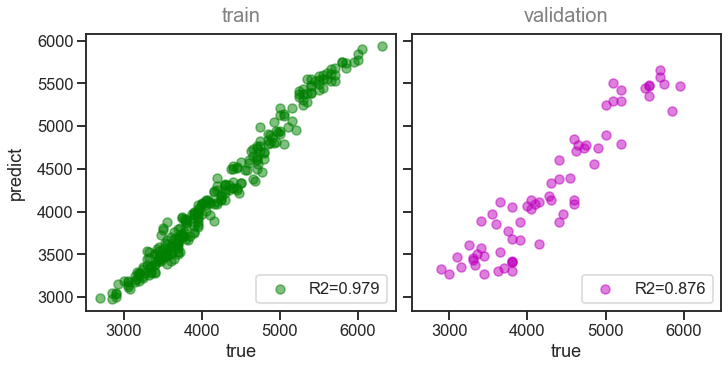

In [20]:
plot_parity(X_train_c, X_test_c, y_train, y_test, rf) # 예측 성능 시각화

# 순열 중요도
* feature 하나를 뒤섞어서 성능 예측
* 중요 피쳐면 값이 많이 틀어질 것 
* 여러번 반복하여 평균, 표준편차 도출 가능 

In [21]:
from sklearn.inspection import permutation_importance

pi = permutation_importance(rf, X_train_c, y_train, n_repeats=30)

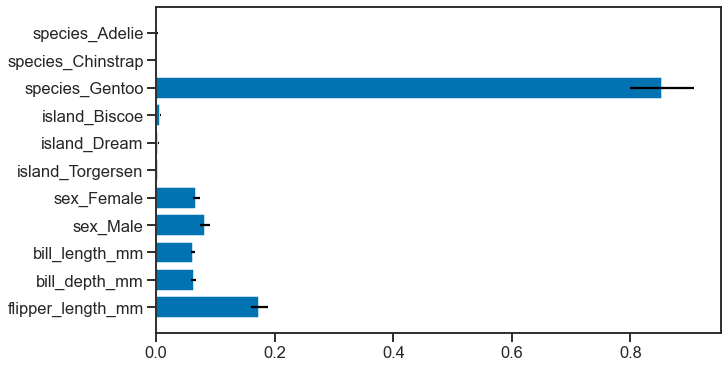

In [22]:
column_names = ["species_Adelie", "species_Chinstrap", "species_Gentoo", "island_Biscoe", "island_Dream", "island_Torgersen", "sex_Female", "sex_Male"] + cols_numerical
column_names

fig, ax = plt.subplots(figsize=(10,5), constrained_layout=True)
ax.barh(column_names, pi.importances_mean, xerr=pi.importances_std)
ax.invert_yaxis()

In [23]:
print(X_train_c[:10])

[[ 1.          0.          0.          1.          0.          0.
   0.          1.         -0.1310646   0.94530743 -0.28430162]
 [ 0.          0.          1.          1.          0.          0.
   0.          1.          1.02862549 -1.09777018  1.09068442]
 [ 0.          0.          1.          1.          0.          0.
   0.          1.          1.71719149 -0.68915465  1.30778747]
 [ 0.          1.          0.          0.          1.          0.
   1.          0.          0.28569903 -0.07623137 -0.35666931]
 [ 1.          0.          0.          0.          0.          1.
   0.          1.         -0.43910728  0.58776885 -0.429037  ]
 [ 1.          0.          0.          0.          0.          1.
   0.          1.         -1.21827406  1.14961519 -1.22508155]
 [ 1.          0.          0.          1.          0.          0.
   1.          0.         -1.70751832  0.48561497 -1.00797849]
 [ 1.          0.          0.          0.          1.          0.
   0.          1.         -0.43

In [24]:
X_train.iloc[:10]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,sex
109,Adelie,Biscoe,43.2,19.0,197.0,Male
263,Gentoo,Biscoe,49.6,15.0,216.0,Male
327,Gentoo,Biscoe,53.4,15.8,219.0,Male
195,Chinstrap,Dream,45.5,17.0,196.0,Female
127,Adelie,Torgersen,41.5,18.3,195.0,Male
77,Adelie,Torgersen,37.2,19.4,184.0,Male
54,Adelie,Biscoe,34.5,18.1,187.0,Female
151,Adelie,Dream,41.5,18.5,201.0,Male
87,Adelie,Dream,36.9,18.6,189.0,Female
255,Gentoo,Biscoe,48.4,16.3,220.0,Male


# Pipeline 
* 모듈화해서 향후 수정,보완이 편하게함
* skorch: pipeline을 pytorch로 구현
* skorch가 한번더 감싸서 scklearn 을 속임 

In [25]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 1-1.categorical feature에 one-hot encoding 적용
cat_features = ["species", "island", "sex"]
cat_transformer = OneHotEncoder()

# 1-2.numerical feature는 standard scaler 적용
num_features = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm"]
num_transformer = StandardScaler()

# 2. 인자 종류별 전처리 적용 (Concat)
preprocessor = ColumnTransformer([("cat", cat_transformer, cat_features), 
                                  ("num", num_transformer, num_features)])

# 3. 전처리 후 랜덤포레스트 적용
pipeline = Pipeline(steps=[("preprocessor", preprocessor), 
                           ("rf", RandomForestRegressor())])

In [27]:
from sklearn import set_config

set_config(display='text') 
pipeline.fit(X_train, y_train)      # X_train_c 아닙니다. 

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['species', 'island', 'sex']),
                                                 ('num', StandardScaler(),
                                                  ['bill_length_mm',
                                                   'bill_depth_mm',
                                                   'flipper_length_mm'])])),
                ('rf', RandomForestRegressor())])

In [28]:
from sklearn import set_config

set_config(display='diagram') 
pipeline.fit(X_train, y_train)      # X_train_c 아닙니다. 

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['species', 'island', 'sex']),
                                                 ('num', StandardScaler(),
                                                  ['bill_length_mm',
                                                   'bill_depth_mm',
                                                   'flipper_length_mm'])])),
                ('rf', RandomForestRegressor())])

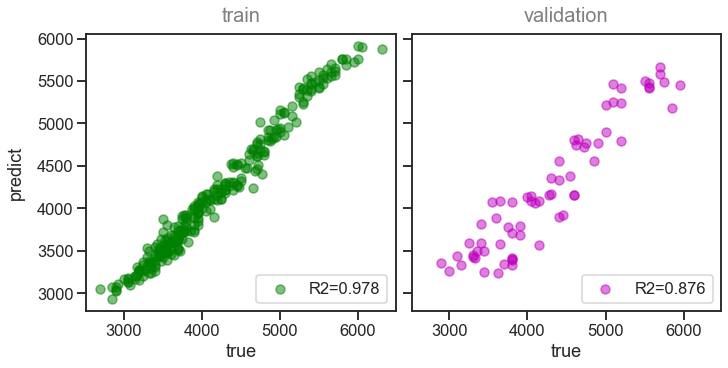

In [29]:
plot_parity(X_train, X_test, y_train, y_test, pipeline)     # pipeline 학습, 성능 평가

<BarContainer object of 6 artists>

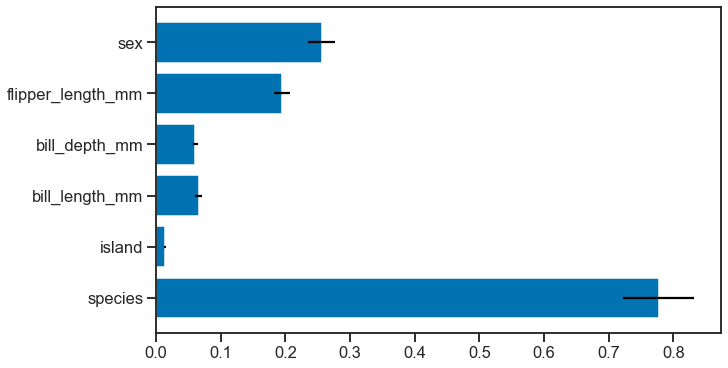

In [30]:
# Input이 onehotencoding이 되기 전이라 잘됨  
pi = permutation_importance(pipeline, X_train, y_train, n_repeats=30)

fig, ax = plt.subplots(figsize=(10,5), constrained_layout=True)
ax.barh(X_train.columns, pi.importances_mean, xerr=pi.importances_std)